## CONTENT LIST
1. Import Libraries
2. Import df from Task 4.9
3. Security Implications
4. Compare customer behavior in different geographic areas
5. Create Exclusion Flag for Low-Activity Customers
6. Create 'Parent Status' Column
7. Create 'Income Level' Column
8. Create 'Pet Order Flag' Column then 'Pet Owner' Column
9. Create 'Baby Order Flag' Column then 'Baby Household' Column
10. Customer Profiles & their Comparison to Regions
11. Visualization - 'Parent Status' Distribution & Regional Distribution
12. Visualization - 'Income Level' Distribution & Regional Distribution
13. Visualization - 'Pet Owner' Distribution & Regional Distribution
14. Visualization - 'Baby Household' Distribution & Regional Distribution
15. Aggregate max, mean, & min variables on Customer Profiles
16. Link between Customer Profiles & Departments?
17. Visualizations for Customer Profiles by Department

## 01. Import Libraries

In [1]:
import gc
gc.collect()

289

In [2]:
#Import Libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

## 02. Import df from Task 4.9

In [3]:
path = r'C:\Users\chery\Desktop\CareerFoundry\Immersion Data Analytics\Achievement 4\02-2022 Instacart Basket Analysis'

In [3]:
df = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'merged_task_4_9_part1.pkl'))

In [4]:
df.shape

(32404859, 31)

In [5]:
df.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,customer_status,product_id,add_to_cart_order,reordered,...,spender_flag,order_frequency,frequent_customer_flag,Gender,State,Customer_Age,date_joined,number_dependants,marital_status,income
0,2539329,1,1,2,8,NaN,New Customer,196,1,0,...,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423
1,2398795,1,2,3,7,15.0,Repeat Customer,196,1,1,...,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423
2,473747,1,3,3,12,21.0,Repeat Customer,196,1,1,...,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423
3,2254736,1,4,4,7,29.0,Repeat Customer,196,1,1,...,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423
4,431534,1,5,4,15,28.0,Repeat Customer,196,1,1,...,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423


In [6]:
df.columns

Index(['order_id', 'user_id', 'order_number', 'orders_day_of_week',
       'order_hour_of_day', 'days_since_prior_order', 'customer_status',
       'product_id', 'add_to_cart_order', 'reordered', '_merge',
       'product_name', 'aisle_id', 'department_id', 'prices',
       'price_range_loc', 'busiest_days', 'busiest_period_of_day', 'max_order',
       'loyalty_flag', 'mean_price_ords', 'spender_flag', 'order_frequency',
       'frequent_customer_flag', 'Gender', 'State', 'Customer_Age',
       'date_joined', 'number_dependants', 'marital_status', 'income'],
      dtype='object')

## 03. Security Implications

Customer's first & last name are PII & were removed earlier because of potential privacy issue (especially with household income being included in the data)

## 04. Compare customer behavior in different geographic areas

In [7]:
#View all States in 'State' column

df['State'].value_counts(dropna= False)

Pennsylvania            667082
California              659783
Rhode Island            656913
Georgia                 656389
New Mexico              654494
Arizona                 653964
North Carolina          651900
Oklahoma                651739
Alaska                  648495
Minnesota               647825
Massachusetts           646358
Wyoming                 644255
Virginia                641421
Missouri                640732
Texas                   640394
Colorado                639280
Maine                   638583
North Dakota            638491
Alabama                 638003
Kansas                  637538
Louisiana               637482
Delaware                637024
South Carolina          636754
Oregon                  636425
Arkansas                636144
Nevada                  636139
New York                635983
Montana                 635265
South Dakota            633772
Illinois                633024
Hawaii                  632901
Washington              632852
Mississi

In [4]:
#Create “Region” column based on “State” column using For-loop

result = []

for value in df ["State"]:
    if (value == "Maine" or value=="New Hampshire" or value=="Vermont" or value=="Massachusetts" or value=="Rhode Island" or value=="Connecticut" or value=="New York" or value=="Pennsylvania" or value=="New Jersey"):
        result.append("Northeast")
    elif (value == "Wisconsin" or value=="Michigan" or value=="Illinois" or value=="Indiana" or value=="Ohio" or value=="North Dakota" or value=="South Dakota" or value=="Nebraska" or value=="Kansas" or value=="Minnesota" or value=="Iowa" or value=="Missouri"):
        result.append("Midwest")
    elif (value == "Delaware" or value== "Maryland" or value== "District of Columbia" or value== "Virginia" or value== "West Virginia" or value== "North Carolina" or value== "South Carolina" or value== "Georgia" or value== "Florida" or value== "Kentucky" or value== "Tennessee" or value== "Mississippi" or value== "Alabama" or value== "Oklahoma" or value== "Texas" or value== "Arkansas" or value== "Louisiana"):
        result.append("South")
    elif (value == "Idaho" or value== "Montana" or value== "Wyoming" or value== "Nevada" or value== "Utah" or value== "Colorado" or value== "Arizona" or value== "New Mexico" or value== "Alaska" or value== "Washington" or value== "Oregon" or value== "California" or value== "Hawaii"):
        result.append("West")
    else:
        result.append("Not Enough Data")

In [9]:
#Viewing result
result

['South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 '

In [5]:
#Create 'Country_Region' column in df using result

df['Country_Region'] = result

In [6]:
#Print frequency of this new column

df['Country_Region'].value_counts(dropna=False)

South        10791885
West          8292913
Midwest       7597325
Northeast     5722736
Name: Country_Region, dtype: int64

In [9]:
#Difference in spending habits b/w regions? - Crossing Region variable w/ Spending Flag

crosstab = pd.crosstab(df['Country_Region'], df['spender_flag'], dropna = False)

In [13]:
#Copy crosstab to clipboard to then past in Excel

crosstab.to_clipboard()

In [14]:
#View crosstab
crosstab

spender_flag,High spender,Low spender
Country_Region,,
Midwest,155946,7441379
Northeast,108218,5614518
South,209637,10582248
West,160316,8132597


Customers from the South make up the largest percentage overall of both high & low spenders followed by the West, Midwest & then finally the Northeast. The highest percentage of low spenders are from the Northeast while the highest percentage of high spenders are from the Midwest.

In [77]:
#Regional statistics - Regional Prices

df.groupby(['Country_Region']).agg({'prices':['median']})

,prices
,median
Country_Region,
Midwest,7.4
Northeast,7.4
South,7.4
West,7.4


No apparent differences in the median prices paid b/w regions

In [78]:
df.groupby(['Country_Region']).agg({'prices':['sum']})

,prices
,sum
Country_Region,
Midwest,7.368753e+07
Northeast,4.872040e+07
South,9.817832e+07
West,6.820244e+07


The South certainly makes up the largest percentage of prices paid followed by the Midwest, West then the Northeast.

In [79]:
df.groupby(['Country_Region']).agg({'order_number':['sum']})

,order_number
,sum
Country_Region,
Midwest,123958909
Northeast,95073717
South,178562060
West,138309325


The South once again emerges as the largest percentage this time in terms of total orders followed by the West, MidWest then the Northeast.

In [80]:
df.groupby(['Country_Region']).agg({'order_hour_of_day':['median']})

,order_hour_of_day
,median
Country_Region,
Midwest,13
Northeast,13
South,13
West,13


No apparent differences b/w regions in the median hour that orders are placed 

In [83]:
df.groupby(['Country_Region']).agg({'days_since_prior_order':['median']})

,days_since_prior_order
,median
Country_Region,
Midwest,7.0
Northeast,7.0
South,7.0
West,7.0


No apparent differences b/w regions in the days since prior orders

### IN SUMMARY: The regions appear to have similar spending habits in regards to 'days_since_prior_order', 'order_hour_of_day' & 'prices'. The South places the greatest number of orders & in turn that is reflected in the highest sum of the prices paid.

## 05. Create Exclusion Flag for Low-Activity Customers

In [7]:
#Checking df shape before sample created
df.shape

(32404859, 32)

In [ ]:
#Create 'If' statements using loc() function

df.loc[df['order_number'] <5,'Activity_Flag'] = 'Low_Activity'

In [12]:
df.loc[df['order_number'] >= 5,'Activity_Flag'] = 'High_Activity'

In [13]:
#Print frequency of new 'Activity_Flag' column

df ['Activity_Flag'].value_counts(dropna=False)

High_Activity    24414877
Low_Activity      7989982
Name: Activity_Flag, dtype: int64

In [14]:
#Create sample df of solely low_activty customers

df_low_activity = df[df.Activity_Flag == 'Low_Activity']

In [21]:
#Check sample df
df_low_activity.shape

(7989982, 33)

In [22]:
df_low_activity ['Activity_Flag'].value_counts(dropna= False)

Low_Activity    7989982
Name: Activity_Flag, dtype: int64

In [23]:
#Export df_low_activity df

df_low_activity.to_pickle(os.path.join(path,'02 Data','Prepared Data', 'df_low_activity_task_4_10_part1.pkl'))

In [15]:
#Update current df to exclude 'Low_Activity' customers

df = df[df.Activity_Flag == 'High_Activity']

In [16]:
#Check main df
df.shape

(24414877, 33)

In [26]:
df['Activity_Flag'].value_counts(dropna= False)

High_Activity    24414877
Name: Activity_Flag, dtype: int64

In [17]:
#Export df for saving progress purposes

df.to_pickle(os.path.join(path,'02 Data','Prepared Data', 'high_activity_only_task_4_10.pkl'))

## 06. Create 'Parent Status' Column

In [3]:
#Import df

df = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'high_activity_only_task_4_10.pkl'))

In [ ]:
#Creat parent status column
df ['Parent_Status']=""

In [5]:
df.loc[((df['Customer_Age'] >= 18) & (df['Customer_Age'] <= 35) & (df['number_dependants'] >= 1)), 'Parent_Status'] = 'Young Parent'

In [7]:
df.loc[(df ['number_dependants'] == 0), 'Parent_Status'] = 'No Dependants'

In [8]:
df.loc[(df['Customer_Age'] >= 35) & (df['Customer_Age'] <= 60) & (df['number_dependants'] >= 1), 'Parent_Status'] = 'Middle Age Parent'

In [9]:
df.loc[(df['Customer_Age'] >= 60) & (df['number_dependants'] >= 1), 'Parent_Status'] = 'Older Age Parent'

In [10]:
#View column counts
df['Parent_Status'].value_counts(dropna= False)

Middle Age Parent    7190133
Older Age Parent     6241386
No Dependants        6105002
Young Parent         4878356
Name: Parent_Status, dtype: int64

## 07. Create 'Income Level' Column

In [11]:
#Create 'Income' column

df ['Income Level']=""

In [12]:
df.loc[(df['income'] < 40100), 'Income Level'] = 'Lower Income'

In [13]:
df.loc[(df['income'] >= 40100) & (df['income'] <= 120400), 'Income Level'] = 'Middle Income'

In [14]:
df.loc[(df['income'] > 120400), 'Income Level'] = 'Higher Income'

In [15]:
df['Income Level'].value_counts(dropna= False)

Middle Income    15977048
Higher Income     7187406
Lower Income      1250423
Name: Income Level, dtype: int64

In [16]:
df.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,customer_status,product_id,add_to_cart_order,reordered,...,State,Customer_Age,date_joined,number_dependants,marital_status,income,Country_Region,Activity_Flag,Parent_Status,Income Level
4,431534,1,5,4,15,28.0,Repeat Customer,196,1,1,...,Alabama,31,2/17/2019,3,married,40423,South,High_Activity,Young Parent,Middle Income
5,3367565,1,6,2,7,19.0,Repeat Customer,196,1,1,...,Alabama,31,2/17/2019,3,married,40423,South,High_Activity,Young Parent,Middle Income
6,550135,1,7,1,9,20.0,Repeat Customer,196,1,1,...,Alabama,31,2/17/2019,3,married,40423,South,High_Activity,Young Parent,Middle Income
7,3108588,1,8,1,14,14.0,Repeat Customer,196,2,1,...,Alabama,31,2/17/2019,3,married,40423,South,High_Activity,Young Parent,Middle Income
8,2295261,1,9,1,16,0.0,Repeat Customer,196,4,1,...,Alabama,31,2/17/2019,3,married,40423,South,High_Activity,Young Parent,Middle Income


In [17]:
#Export df for saving progress purposes

df.to_pickle(os.path.join(path,'02 Data','Prepared Data', 'parent_income_profiles.pkl'))

## 08. Create 'Pet Order Flag' Column then 'Pet Owner' Column

### Create Pet Order Flag Column

In [ ]:
#Import parent_income_profiles df

df = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'parent_income_profiles.pkl'))

In [5]:
#Create pet order flag column

df ['Pet Order Flag']=""

In [6]:
df.loc[(df['department_id'] == 8), 'Pet Order Flag'] = 1

In [7]:
df.loc[(df['department_id'] != 8), 'Pet Order Flag'] = 0

In [8]:
df['Pet Order Flag'].value_counts(dropna= False)

0    24342766
1       72111
Name: Pet Order Flag, dtype: int64

In [9]:
df.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,customer_status,product_id,add_to_cart_order,reordered,...,Customer_Age,date_joined,number_dependants,marital_status,income,Country_Region,Activity_Flag,Parent_Status,Income Level,Pet Order Flag
4,431534,1,5,4,15,28.0,Repeat Customer,196,1,1,...,31,2/17/2019,3,married,40423,South,High_Activity,Young Parent,Middle Income,0
5,3367565,1,6,2,7,19.0,Repeat Customer,196,1,1,...,31,2/17/2019,3,married,40423,South,High_Activity,Young Parent,Middle Income,0
6,550135,1,7,1,9,20.0,Repeat Customer,196,1,1,...,31,2/17/2019,3,married,40423,South,High_Activity,Young Parent,Middle Income,0
7,3108588,1,8,1,14,14.0,Repeat Customer,196,2,1,...,31,2/17/2019,3,married,40423,South,High_Activity,Young Parent,Middle Income,0
8,2295261,1,9,1,16,0.0,Repeat Customer,196,4,1,...,31,2/17/2019,3,married,40423,South,High_Activity,Young Parent,Middle Income,0


In [10]:
df.shape

(24414877, 36)

In [11]:
#Export df with Pet Order Flag column

df.to_pickle(os.path.join(path,'02 Data','Prepared Data', 'pet_order_flag.pkl'))

### Create Pet Owner Column

In [10]:
#Import pet order flag df

df= pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'pet_order_flag.pkl'))

In [11]:
df.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,customer_status,product_id,add_to_cart_order,reordered,...,Customer_Age,date_joined,number_dependants,marital_status,income,Country_Region,Activity_Flag,Parent_Status,Income Level,Pet Order Flag
4,431534,1,5,4,15,28.0,Repeat Customer,196,1,1,...,31,2/17/2019,3,married,40423,South,High_Activity,Young Parent,Middle Income,0
5,3367565,1,6,2,7,19.0,Repeat Customer,196,1,1,...,31,2/17/2019,3,married,40423,South,High_Activity,Young Parent,Middle Income,0
6,550135,1,7,1,9,20.0,Repeat Customer,196,1,1,...,31,2/17/2019,3,married,40423,South,High_Activity,Young Parent,Middle Income,0
7,3108588,1,8,1,14,14.0,Repeat Customer,196,2,1,...,31,2/17/2019,3,married,40423,South,High_Activity,Young Parent,Middle Income,0
8,2295261,1,9,1,16,0.0,Repeat Customer,196,4,1,...,31,2/17/2019,3,married,40423,South,High_Activity,Young Parent,Middle Income,0


In [12]:
df.shape

(24414877, 36)

In [13]:
# Group by user_id, sum by total num of orders in dept 8 per user_id (Pet Order Flag)

df_grouped = df.groupby('user_id').agg({'Pet Order Flag':'sum'})

In [14]:
# Create Pet Owner column 

df_grouped['Pet Owner'] =""

In [15]:
# If Pet Order >= 1 then "Pet Owner" (user had 1 or more orders in dept 8

df_grouped.loc[(df_grouped['Pet Order Flag'] >= 1), 'Pet Owner'] = "Pet Owner"

In [16]:
# If user has no orders in dept 8

df_grouped.loc[(df_grouped['Pet Order Flag'] == 0), 'Pet Owner'] = "Not Pet Owner"

In [18]:
# Drop Pet Order Flag column

df_grouped = df_grouped.drop(columns = ['Pet Order Flag'])

In [19]:
df_grouped.shape

(162631, 1)

In [18]:
#Export grouped Pet Order Flag df

df_grouped.to_pickle(os.path.join(path,'02 Data','Prepared Data', 'grouped_pet_order_flag.pkl'))

### Merge original df with Pet Owner df

In [4]:
#Import pet order flag

df= pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'pet_order_flag.pkl'))

In [5]:
#Import grouped pet order flag

df_grouped = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'grouped_pet_order_flag.pkl'))

In [6]:
# Left join df (left) with df_grouped (right) to get "Pet Order" for each user_id

df = df.merge(df_grouped, on='user_id', how='left')

In [7]:
df['Pet Owner'].value_counts(dropna= False)

Not Pet Owner    21782777
Pet Owner         2632100
Name: Pet Owner, dtype: int64

In [8]:
df.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,customer_status,product_id,add_to_cart_order,reordered,...,date_joined,number_dependants,marital_status,income,Country_Region,Activity_Flag,Parent_Status,Income Level,Pet Order Flag,Pet Owner
0,431534,1,5,4,15,28.0,Repeat Customer,196,1,1,...,2/17/2019,3,married,40423,South,High_Activity,Young Parent,Middle Income,0,Not Pet Owner
1,3367565,1,6,2,7,19.0,Repeat Customer,196,1,1,...,2/17/2019,3,married,40423,South,High_Activity,Young Parent,Middle Income,0,Not Pet Owner
2,550135,1,7,1,9,20.0,Repeat Customer,196,1,1,...,2/17/2019,3,married,40423,South,High_Activity,Young Parent,Middle Income,0,Not Pet Owner
3,3108588,1,8,1,14,14.0,Repeat Customer,196,2,1,...,2/17/2019,3,married,40423,South,High_Activity,Young Parent,Middle Income,0,Not Pet Owner
4,2295261,1,9,1,16,0.0,Repeat Customer,196,4,1,...,2/17/2019,3,married,40423,South,High_Activity,Young Parent,Middle Income,0,Not Pet Owner


In [9]:
df = df.drop(columns =['Pet Order Flag'])

In [10]:
df.shape

(24414877, 36)

In [11]:
df.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,customer_status,product_id,add_to_cart_order,reordered,...,Customer_Age,date_joined,number_dependants,marital_status,income,Country_Region,Activity_Flag,Parent_Status,Income Level,Pet Owner
0,431534,1,5,4,15,28.0,Repeat Customer,196,1,1,...,31,2/17/2019,3,married,40423,South,High_Activity,Young Parent,Middle Income,Not Pet Owner
1,3367565,1,6,2,7,19.0,Repeat Customer,196,1,1,...,31,2/17/2019,3,married,40423,South,High_Activity,Young Parent,Middle Income,Not Pet Owner
2,550135,1,7,1,9,20.0,Repeat Customer,196,1,1,...,31,2/17/2019,3,married,40423,South,High_Activity,Young Parent,Middle Income,Not Pet Owner
3,3108588,1,8,1,14,14.0,Repeat Customer,196,2,1,...,31,2/17/2019,3,married,40423,South,High_Activity,Young Parent,Middle Income,Not Pet Owner
4,2295261,1,9,1,16,0.0,Repeat Customer,196,4,1,...,31,2/17/2019,3,married,40423,South,High_Activity,Young Parent,Middle Income,Not Pet Owner


In [12]:
#Export df with Pet Owner column

df.to_pickle(os.path.join(path,'02 Data','Prepared Data', 'pet_owner_column_created.pkl'))

## 09. Create 'Baby Order Flag' Column then 'Baby Household' Column

### Create Baby Order Flag Column

In [13]:
#Create baby order column

df['Baby Order Flag']=""

In [14]:
df.loc[(df['department_id'] == 18), 'Baby Order Flag'] = 1

In [15]:
df.loc[(df['department_id'] != 18), 'Baby Order Flag'] = 0

In [16]:
#Print value counts for new column

df['Baby Order Flag'].value_counts(dropna= False)

0    24078930
1      335947
Name: Baby Order Flag, dtype: int64

In [17]:
df.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,customer_status,product_id,add_to_cart_order,reordered,...,date_joined,number_dependants,marital_status,income,Country_Region,Activity_Flag,Parent_Status,Income Level,Pet Owner,Baby Order Flag
0,431534,1,5,4,15,28.0,Repeat Customer,196,1,1,...,2/17/2019,3,married,40423,South,High_Activity,Young Parent,Middle Income,Not Pet Owner,0
1,3367565,1,6,2,7,19.0,Repeat Customer,196,1,1,...,2/17/2019,3,married,40423,South,High_Activity,Young Parent,Middle Income,Not Pet Owner,0
2,550135,1,7,1,9,20.0,Repeat Customer,196,1,1,...,2/17/2019,3,married,40423,South,High_Activity,Young Parent,Middle Income,Not Pet Owner,0
3,3108588,1,8,1,14,14.0,Repeat Customer,196,2,1,...,2/17/2019,3,married,40423,South,High_Activity,Young Parent,Middle Income,Not Pet Owner,0
4,2295261,1,9,1,16,0.0,Repeat Customer,196,4,1,...,2/17/2019,3,married,40423,South,High_Activity,Young Parent,Middle Income,Not Pet Owner,0


### Create Baby Household Column

In [18]:
# Group by user_id, sum by total num of orders in dept 18 per user_id (Baby Order Flag)

df_baby_grouped = df.groupby('user_id').agg({'Baby Order Flag':'sum'})

In [19]:
# Create Baby Household column 

df_baby_grouped['Baby Household'] =""

In [20]:
# If Baby Order >= 1 then "Baby Household" (user had 1 or more orders in dept 18)

df_baby_grouped.loc[(df_baby_grouped['Baby Order Flag'] >= 1), 'Baby Household'] = "Baby Household"

In [21]:
# If Baby Order = 0 then "Baby Household" (user had no orders in dept 18)

df_baby_grouped.loc[(df_baby_grouped['Baby Order Flag'] == 0), 'Baby Household'] = "Non-Baby Household"

In [22]:
df_baby_grouped.shape

(162631, 2)

In [23]:
df_baby_grouped.head()

,Baby Order Flag,Baby Household
user_id,,
1,0,Non-Baby Household
10,0,Non-Baby Household
100,0,Non-Baby Household
1000,0,Non-Baby Household
10000,0,Non-Baby Household


### Merge original df with Baby Household df

In [24]:
# Left join df (left) with df_baby_grouped (right) to get "Baby Household" for each user_id

df = df.merge(df_baby_grouped, on='user_id', how='left')

In [25]:
df['Baby Household'].value_counts(dropna= False)

Non-Baby Household    16594684
Baby Household         7820193
Name: Baby Household, dtype: int64

In [26]:
df.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,customer_status,product_id,add_to_cart_order,reordered,...,marital_status,income,Country_Region,Activity_Flag,Parent_Status,Income Level,Pet Owner,Baby Order Flag_x,Baby Order Flag_y,Baby Household
0,431534,1,5,4,15,28.0,Repeat Customer,196,1,1,...,married,40423,South,High_Activity,Young Parent,Middle Income,Not Pet Owner,0,0,Non-Baby Household
1,3367565,1,6,2,7,19.0,Repeat Customer,196,1,1,...,married,40423,South,High_Activity,Young Parent,Middle Income,Not Pet Owner,0,0,Non-Baby Household
2,550135,1,7,1,9,20.0,Repeat Customer,196,1,1,...,married,40423,South,High_Activity,Young Parent,Middle Income,Not Pet Owner,0,0,Non-Baby Household
3,3108588,1,8,1,14,14.0,Repeat Customer,196,2,1,...,married,40423,South,High_Activity,Young Parent,Middle Income,Not Pet Owner,0,0,Non-Baby Household
4,2295261,1,9,1,16,0.0,Repeat Customer,196,4,1,...,married,40423,South,High_Activity,Young Parent,Middle Income,Not Pet Owner,0,0,Non-Baby Household


In [27]:
df.shape

(24414877, 39)

In [28]:
#Drop Baby Order Flag columns

df = df.drop(columns = ['Baby Order Flag_x','Baby Order Flag_y'])

In [29]:
#Ensure columns dropped
df.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,customer_status,product_id,add_to_cart_order,reordered,...,date_joined,number_dependants,marital_status,income,Country_Region,Activity_Flag,Parent_Status,Income Level,Pet Owner,Baby Household
0,431534,1,5,4,15,28.0,Repeat Customer,196,1,1,...,2/17/2019,3,married,40423,South,High_Activity,Young Parent,Middle Income,Not Pet Owner,Non-Baby Household
1,3367565,1,6,2,7,19.0,Repeat Customer,196,1,1,...,2/17/2019,3,married,40423,South,High_Activity,Young Parent,Middle Income,Not Pet Owner,Non-Baby Household
2,550135,1,7,1,9,20.0,Repeat Customer,196,1,1,...,2/17/2019,3,married,40423,South,High_Activity,Young Parent,Middle Income,Not Pet Owner,Non-Baby Household
3,3108588,1,8,1,14,14.0,Repeat Customer,196,2,1,...,2/17/2019,3,married,40423,South,High_Activity,Young Parent,Middle Income,Not Pet Owner,Non-Baby Household
4,2295261,1,9,1,16,0.0,Repeat Customer,196,4,1,...,2/17/2019,3,married,40423,South,High_Activity,Young Parent,Middle Income,Not Pet Owner,Non-Baby Household


In [30]:
#Export df with Baby Household column

df.to_pickle(os.path.join(path,'02 Data','Prepared Data', 'baby_household_column_created.pkl'))

## 10. Customer Profiles & their Comparison to Regions

### Create Customer Profile df

In [31]:
#Create new df with only necessary columns

df_customer_profile = df[['user_id', 'Country_Region', 'department_id', 'Parent_Status', 'Income Level', 'Pet Owner', 'Baby Household']]

In [32]:
#View df_customer_profile

df_customer_profile.head()

,user_id,Country_Region,department_id,Parent_Status,Income Level,Pet Owner,Baby Household
0,1,South,7,Young Parent,Middle Income,Not Pet Owner,Non-Baby Household
1,1,South,7,Young Parent,Middle Income,Not Pet Owner,Non-Baby Household
2,1,South,7,Young Parent,Middle Income,Not Pet Owner,Non-Baby Household
3,1,South,7,Young Parent,Middle Income,Not Pet Owner,Non-Baby Household
4,1,South,7,Young Parent,Middle Income,Not Pet Owner,Non-Baby Household


In [33]:
df_customer_profile.shape

(24414877, 7)

In [34]:
#Export df with solely customer profile columns

df_customer_profile.to_pickle(os.path.join(path,'02 Data','Prepared Data', 'only_customer_profiles.pkl'))

### Group by Country Region

In [35]:
#Count of user_id in each region

df_region = df_customer_profile.groupby('Country_Region').agg({'user_id':['nunique']})

In [36]:
#View grouped result
df_region

,user_id
,nunique
Country_Region,
Midwest,38376
Northeast,28581
South,54193
West,41481


### Group by Parent Status

In [37]:
df_parent = df_customer_profile.groupby('Parent_Status').agg({'user_id':['nunique']})

In [38]:
df_parent

,user_id
,nunique
Parent_Status,
Middle Age Parent,47743
No Dependants,40727
Older Age Parent,41942
Young Parent,32219


### Group by Parent Status & Region

In [41]:
#Count of user_id in each Parent category

df_parent_region = df_customer_profile.groupby(['Parent_Status','Country_Region']).agg({'user_id':['nunique']})

In [44]:
df_parent_region

user_id
                                 nunique
Parent_Status     Country_Region        
Middle Age Parent Midwest          11364
                  Northeast         8490
                  South            15827
                  West             12062
No Dependants     Midwest           9566
                  Northeast         7255
                  South            13537
                  West             10369
Older Age Parent  Midwest           9874
                  Northeast         7285
                  South            14063
                  West             10720
Young Parent      Midwest           7572
                  Northeast         5551
                  South            10766
                  West              8330

### Group by Income Level

In [45]:
df_income = df_customer_profile.groupby('Income Level').agg({'user_id':['nunique']})

In [46]:
df_income

,user_id
,nunique
Income Level,
Higher Income,44913
Lower Income,12736
Middle Income,104982


### Group by Income Level & Region

In [47]:
df_income_region = df_customer_profile.groupby(['Income Level','Country_Region']).agg({'user_id':['nunique']})

In [48]:
df_income_region

user_id
                             nunique
Income Level  Country_Region        
Higher Income Midwest          10738
              Northeast         7936
              South            14814
              West             11425
Lower Income  Midwest           2962
              Northeast         2279
              South             4234
              West              3261
Middle Income Midwest          24676
              Northeast        18366
              South            35145
              West             26795

### Group by Pet Owner

In [39]:
df_pet = df_customer_profile.groupby('Pet Owner').agg({'user_id':['nunique']})

In [40]:
df_pet

,user_id
,nunique
Pet Owner,
Not Pet Owner,151786
Pet Owner,10845


### Group by Pet Owner & Region

In [41]:
df_pet_region = df_customer_profile.groupby(['Pet Owner','Country_Region']).agg({'user_id':['nunique']})

In [42]:
df_pet_region

user_id
                             nunique
Pet Owner     Country_Region        
Not Pet Owner Midwest          35806
              Northeast        26702
              South            50643
              West             38635
Pet Owner     Midwest           2570
              Northeast         1879
              South             3550
              West              2846

### Group by Baby Household

In [43]:
df_baby = df_customer_profile.groupby('Baby Household').agg({'user_id':['nunique']})

In [44]:
df_baby

,user_id
,nunique
Baby Household,
Baby Household,25771
Non-Baby Household,136860


### Group by Baby Household & Region

In [46]:
df_baby_region = df_customer_profile.groupby(['Baby Household','Country_Region']).agg({'user_id':['nunique']})

In [47]:
df_baby_region

user_id
                                  nunique
Baby Household     Country_Region        
Baby Household     Midwest           6161
                   Northeast         4492
                   South             8612
                   West              6506
Non-Baby Household Midwest          32215
                   Northeast        24089
                   South            45581
                   West             34975

## 11. Visualization - 'Parent Status' Distribution & Regional Distribution

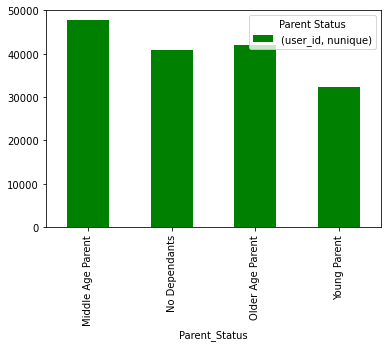

In [57]:
#Create Bar Chart for parent status

df_parent.plot.bar(color=['green'])
plt.legend(title='Parent Status')

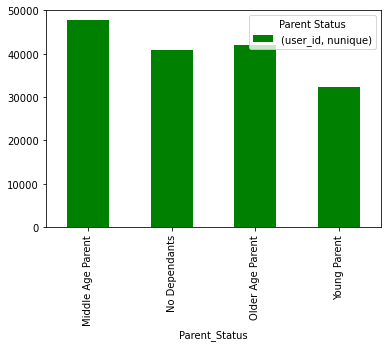

In [59]:
#Saving Bar Chart in jupyter memory

bar_parent_status = df_parent.plot.bar(color=['green'])
plt.legend(title='Parent Status')

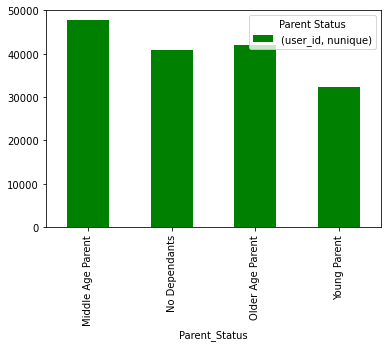

In [60]:
#View bar chart
bar_parent_status.figure

In [61]:
#Export chart outside of jupyter in form of image file
bar_parent_status.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_parent_stask_4_10.png'))

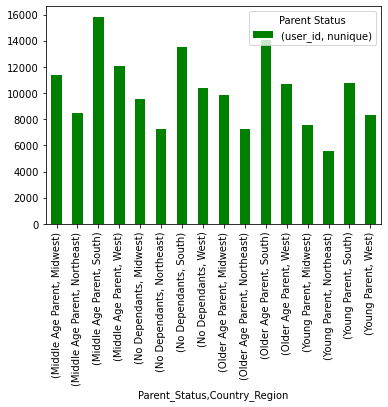

In [62]:
#Create Bar Chart for parent status & region

bar_parent_region = df_parent_region.plot.bar(color=['green'])
plt.legend(title='Parent Status')

In [63]:
#Export chart

bar_parent_region.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_parent_region_task_4_10.png'))

## 12. Visualization - 'Income Level' Distribution & Regional Distribution

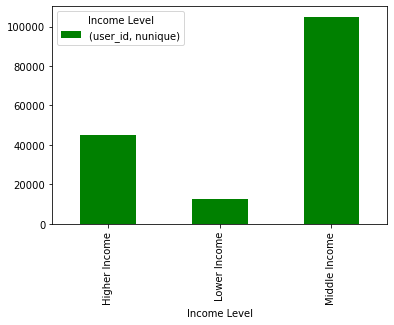

In [64]:
#Create Bar Chart for income status

bar_income = df_income.plot.bar(color=['green'])
plt.legend(title='Income Level')

In [65]:
#Export Income Bar Chart

bar_income.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_income_4_10.png'))

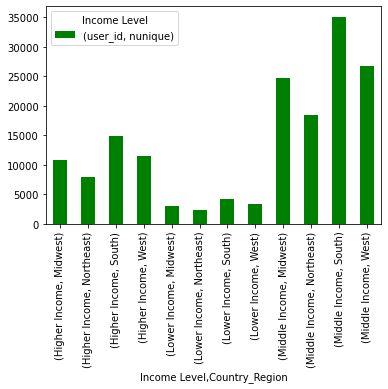

In [66]:
#Create Bar Chart for income status by region

bar_income_region = df_income_region.plot.bar(color=['green'])
plt.legend(title='Income Level')

In [67]:
#Export Income & Region Bar Chart

bar_income_region.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_income_region_task_4_10.png'))

## 13. Visualization - 'Pet Owner' Distribution & Regional Distribution

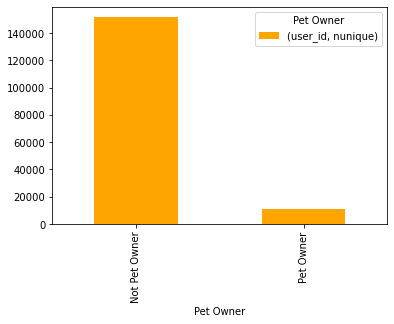

In [71]:
#Create Bar Chart for pet owner status

bar_pet = df_pet.plot.bar(color=['orange'])
plt.legend(title='Pet Owner')

In [72]:
#Export Pet Bar chart

bar_pet.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_pet_owner.png'))

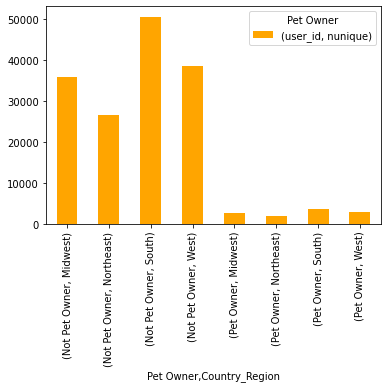

In [73]:
#Create Bar Chart for pet owner status & region

bar_pet_region = df_pet_region.plot.bar(color=['orange'])
plt.legend(title='Pet Owner')

In [74]:
#Export Pet & Region Bar chart

bar_pet_region.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_pet_region.png'))

## 14. Visualization - 'Baby Household' Distribution & Regional Distribution 

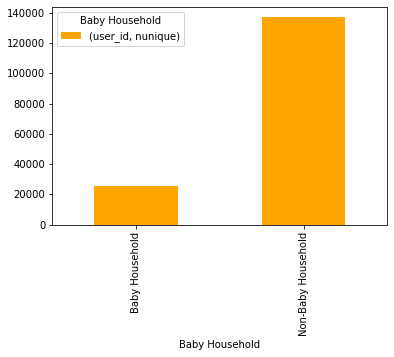

In [75]:
#Create baby household bar chart 

bar_baby = df_baby.plot.bar(color=['orange'])
plt.legend(title='Baby Household')

In [76]:
#Export baby household chart 

bar_baby.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_baby_household.png'))

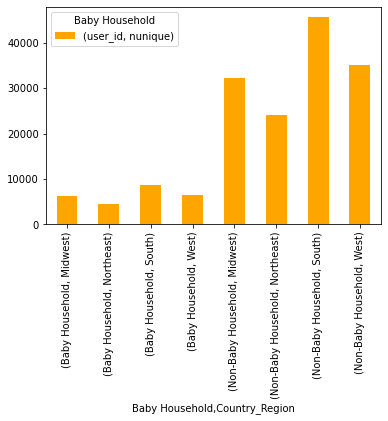

In [77]:
#Create Bar Chart for baby household & region

bar_baby_region = df_baby_region.plot.bar(color=['orange'])
plt.legend(title='Baby Household')

In [78]:
#Export baby household & region chart 

bar_baby_region.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_baby_household_region.png'))

## 15. Aggregate max, mean, & min variables on Customer Profiles 

In [146]:
#Do certain Parent categories shop at different hours of the day?

df.groupby('Parent_Status').agg({'order_hour_of_day':['max','min','mean','median']})

order_hour_of_day                      
                                max min       mean median
Parent_Status                                            
Middle Age Parent                23   0  13.374915     13
No Dependants                    23   0  13.365228     13
Older Age Parent                 23   0  13.362096     13
Young Parent                     23   0  13.341019     13

No strong correlation b/w variables

In [222]:
#Do certain Parent categories shop on different days of the week?

df.groupby('Parent_Status').agg({'orders_day_of_week':['max','min','mean','median']})

orders_day_of_week                     
                                 max min      mean median
Parent_Status                                            
Middle Age Parent                  6   0  2.751182      3
No Dependants                      6   0  2.741635      3
Older Age Parent                   6   0  2.753424      3
Young Parent                       6   0  2.744084      3

No strong correlation b/w variables

In [56]:
#Do certain ages tend to be pet owners?

df.groupby('Pet Owner').agg({'Customer_Age':['mean','median','min', 'max']})

Customer_Age               
                      mean median min max
Pet Owner                                
Not Pet Owner    49.426973     49  18  81
Pet Owner        49.708635     50  18  81

No strong correlation b/w variables

In [229]:
#Do females or males tend to place orders fewer days apart? 

df.groupby('Gender').agg({'days_since_prior_order':['mean','median','min', 'max']})

days_since_prior_order                  
                         mean median  min   max
Gender                                         
Female              10.063808    7.0  0.0  30.0
Male                10.106382    7.0  0.0  30.0

Females tend to shop slightly more frequently than male customers

In [231]:
#Do females or males tend to place orders at certain times of day? 

df.groupby('Gender').agg({'order_hour_of_day':['mean','median','min', 'max']})

order_hour_of_day               
                    mean median min max
Gender                                 
Female         13.361393     13   0  23
Male           13.363479     13   0  23

No strong correlation b/w variables

In [219]:
#Do higher spenders shop at different hours of the day?

df.groupby('spender_flag').agg({'order_hour_of_day':['mean','median','min', 'max']})

order_hour_of_day               
                          mean median min max
spender_flag                                 
High spender         13.250896     13   0  23
Low spender          13.364693     13   0  23

Higher spenders tend to shop at slightly earlier times in the day

In [220]:
#Do higher spenders shop on different days of the week?

df.groupby('spender_flag').agg({'orders_day_of_week':['mean','median','min', 'max']})

orders_day_of_week               
                           mean median min max
spender_flag                                  
High spender           2.782689      3   0   6
Low spender            2.747249      3   0   6

Higher spenders tend to shop slightly later in the week

In [57]:
#Do pet owners tend to have higher incomes?

df.groupby('Pet Owner').agg({'income':['mean','median','min', 'max']})

income                      
                        mean median    min     max
Pet Owner                                         
Not Pet Owner   99252.678048  96507  25903  593901
Pet Owner      105211.200993  99649  26256  591089

Yes, pet owners tend to have higher income levels

In [230]:
#Do those with higher income levels order more frequently? 

df.groupby('Income Level').agg({'days_since_prior_order':['mean','median','min', 'max']})

days_since_prior_order                  
                                mean median  min   max
Income Level                                          
Higher Income              10.037040    7.0  0.0  30.0
Lower Income               10.472628    7.0  0.0  30.0
Middle Income              10.076596    7.0  0.0  30.0

Yes, higher income customers tend to shop slightly more frequently

In [58]:
#Do households with babies place orders fewer days apart?

df.groupby('Baby Household').agg({'days_since_prior_order':['mean','median','min', 'max']})

days_since_prior_order                  
                                     mean median  min   max
Baby Household                                             
Baby Household                   8.671506    7.0  0.0  30.0
Non-Baby Household              10.751449    7.0  0.0  30.0

Yes, baby households tend to place orders more frequently (fewer days apart) than non-baby households

## 16. Link between Customer Profiles & Departments?

### Parent Status

In [79]:
#Parent Status by Department

crosstab_parent_department = pd.crosstab(df_customer_profile['department_id'],df_customer_profile['Parent_Status'], dropna=False )
crosstab_parent_department 

Parent_Status,Middle Age Parent,No Dependants,Older Age Parent,Young Parent
department_id,,,,
1,479820,405513,417655,324626
2,7734,6935,6858,5639
3,259877,221599,225756,176098
4,2125440,1812885,1849447,1439319
5,30666,27959,26386,22961
6,58413,50038,49693,39756
7,598183,512055,524930,401279
8,20922,18250,18484,14455
9,187875,157414,161388,127048


In [90]:
crosstab_parent_department.to_clipboard()

Each age category places roughly the same percentage of orders from each department - Middle Aged Parents always make up the largest percentage while Young Parents make up the lowest percentage. No Dependants & Older Age Parents alternate as the 2nd & 3rd largest percentage. 

Produce & Dairy/eggs are by far the most popular departments for each age group.

Surprisingly, all categories (including No Dependants) purchase items from the Baby department. Perhaps as gifts?

### Income Level

In [91]:
#Income Level by Department

crosstab_income_department = pd.crosstab(df_customer_profile['department_id'],df_customer_profile['Income Level'], dropna=False )
crosstab_income_department 

Income Level,Higher Income,Lower Income,Middle Income
department_id,,,
1,490841,76502,1060271
2,8111,1544,17511
3,268988,37912,576430
4,2150982,296229,4779880
5,35456,6059,66457
6,59328,7554,131018
7,574983,150700,1310764
8,23225,3364,45522
9,194212,21542,417971


In [92]:
crosstab_income_department.to_clipboard()

Each income level places roughly the same percentage of orders from each department - Higher Income always make up the largest percentage followed by Middle Income then Lower Income.


Percentages to take note of are:

*Middle income groups purchase the least from Departments 5 (alcohol) & 8 (pet)

*Lower income consistently make up 4-6% of most departments but this increases greatly in Department 19 (snacks) where they make up 11%

*The percentage of Higher income orders on the otherhand drop to 26% for snacks (the lowest percentage) for higher income

*Higher income customers largest percentage spent is in deparments 8 (pets) & 12(meat/seafood)

### Pet Owner

In [60]:
#Pet Owner by Department

crosstab_pet_department = pd.crosstab(df_customer_profile['department_id'],df_customer_profile['Pet Owner'], dropna=False )
crosstab_pet_department 

Pet Owner,Not Pet Owner,Pet Owner
department_id,,
1,1418385,209229
2,23146,4020
3,778259,105071
4,6634401,592690
5,87851,20121
6,174523,23377
7,1792923,243524
8,0,72111
9,558284,75441


crosstab_pet_department.to_clipboard()

Pet owners consistently make up 8-12% of all departments while of course making up 100% of department 8 (pets). Things to note include:

*Pet owners smallest percentage is in Department 10 (bulk)

*Non-pet owners smallest percentage is Department 5 (alcohol) & Department 17 (household)

### Baby Households

In [62]:
#Baby Household by Department

crosstab_baby_department = pd.crosstab(df_customer_profile['department_id'],df_customer_profile['Baby Household'], dropna=False )
crosstab_baby_department 

Baby Household,Baby Household,Non-Baby Household
department_id,,
1,530363,1097251
2,8964,18202
3,290303,593027
4,2249054,4978037
5,15903,92069
6,59661,138239
7,516211,1520236
8,18240,53871
9,229047,404678


In [64]:
crosstab_baby_department.to_clipboard()

Baby households consistently make up 29-34% of all departments while of course making up 100% of department 18 (baby). Things to note include:

*Baby households smallest percentage is in Department 5 (alcohol) at a very low 15% which in turn makes Non-baby households largest percentage be at 85% for Department 5 (alcohol).

## 17. Visualizations for Customer Profiles by Department

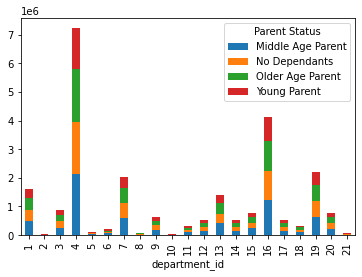

In [156]:
#Parent Status & Department Stacked Bar

parent_department_stacked_bar = crosstab_parent_department.plot.bar(stacked= True)
plt.legend(title='Parent Status')

In [157]:
#Export bar chart 

parent_department_stacked_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'parent_department_stacked_bar.png'))

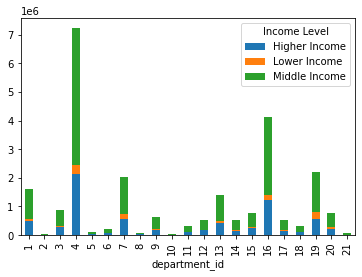

In [159]:
#Income Level & Department Stacked Bar

income_department_stacked_bar = crosstab_income_department.plot.bar(stacked= True)
plt.legend(title='Income Level')

In [160]:
#Export bar chart 

income_department_stacked_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'income_department_stacked_bar.png'))

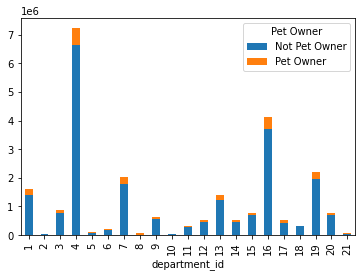

In [65]:
#Pet Owner & Department Stacked Bar

pet_department_stacked_bar = crosstab_pet_department.plot.bar(stacked= True)
plt.legend(title='Pet Owner')

In [66]:
#Export bar chart 

pet_department_stacked_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'pet_department_stacked_bar.png'))

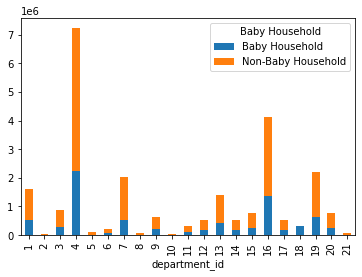

In [67]:
#Baby Household & Department Stacked Bar

baby_department_stacked_bar = crosstab_baby_department.plot.bar(stacked= True)
plt.legend(title='Baby Household')

In [68]:
#Export bar chart 

baby_department_stacked_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'baby_department_stacked_bar.png'))